In [2]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/Darrel.Moxam@ibm.com/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.0 MB  conda-forge
    openssl-1.1.1g             |       haf1e3a3_1         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.9 MB

The following packages will be UPDATED:

  conda                                4.8.3-py37hc8dfbb8_1 --> 4.8.4-py37hc8dfbb8_2
  openssl                                 1.1.1g-h0b31af3_0 --> 1.1.1g-haf1e3a3_1



conda-4.8.4          | 3.0 MB    | ##################################### | 100% 
openssl-1.1.1g       | 1.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transac

# Buisness Understanding 
Reason why I chose this Dataset for My first Udacity project was simply becasue it was a practice data set <br>
given to me by my mentor and i thought it was suitable for the project. The dataset is a small dataset with <br>
5000 rows of data with 10 columns. Simple credit risk data set for practice. 
#### * Is there any duplicates found in the data is so how many are there ?
#### * From the data set provided whats the most job criteria there is ?
#### * What is the age difference between the youngest and oldest person that received a loan and the age of those individuals.

## import libaries needed

In [3]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',200)
import numpy as np
import xgboost as xgb

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Gather the Data 

In [7]:
df_data_1 = pd.read_csv("credit_risk_training_redacted.csv")
df_data_1.head()

,checkingstatus,loanduration,credithistory,loanpurpose,loanamount,existingsavings,employmentduration,installmentpercent,sex,othersonloan,currentresidenceduration,ownsproperty,age,installmentplans,housing,existingcreditscount,job,dependents,telephone,foreignworker,risk
0,less_0,9,prior_payments_delayed,furniture,2219,less_100,1_to_4,1,female,none,1,savings_insurance,29,stores,own,2,skilled,1,none,yes,No Risk
1,less_0,35,credits_paid_to_date,car_used,389,100_to_500,4_to_7,3,female,none,2,car_other,40,stores,rent,1,unskilled,1,none,yes,Risk
2,0_to_200,19,credits_paid_to_date,repairs,2083,500_to_1000,less_1,3,female,none,2,real_estate,35,none,own,1,skilled,1,none,yes,No Risk
3,no_checking,36,prior_payments_delayed,appliances,5927,unknown,greater_7,4,male,co-applicant,3,savings_insurance,47,none,own,2,skilled,1,none,yes,Risk
4,no_checking,28,outstanding_credit,appliances,4053,unknown,greater_7,5,male,none,3,unknown,45,none,own,2,skilled,1,none,yes,Risk


In [8]:
df = df_data_1

# Assess the Data 
## Perform basic EDA to have a look at the data

In [9]:
df.columns

Index(['checkingstatus', 'loanduration', 'credithistory', 'loanpurpose',
       'loanamount', 'existingsavings', 'employmentduration',
       'installmentpercent', 'sex', 'othersonloan', 'currentresidenceduration',
       'ownsproperty', 'age', 'installmentplans', 'housing',
       'existingcreditscount', 'job', 'dependents', 'telephone',
       'foreignworker', 'risk'],
      dtype='object')

In [10]:
df.shape

(5000, 21)

In [11]:
df.describe()

,loanduration,loanamount,installmentpercent,currentresidenceduration,age,existingcreditscount,dependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.393000,3480.145000,2.982400,2.854200,35.932400,1.465800,1.164600
std,11.162843,2488.232783,1.127096,1.115702,10.648536,0.565415,0.370856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1326.750000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3238.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,29.000000,5355.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


In [12]:
df.nunique()

checkingstatus                 4
loanduration                  59
credithistory                  5
loanpurpose                   11
loanamount                  3354
existingsavings                5
employmentduration             5
installmentpercent             6
sex                            2
othersonloan                   3
currentresidenceduration       6
ownsproperty                   4
age                           53
installmentplans               3
housing                        3
existingcreditscount           4
job                            4
dependents                     2
telephone                      2
foreignworker                  2
risk                           2
dtype: int64

# Prepare The Data

## Clean the Data

In [13]:
#checking for nulls
df.isna().sum()

checkingstatus              0
loanduration                0
credithistory               0
loanpurpose                 0
loanamount                  0
existingsavings             0
employmentduration          0
installmentpercent          0
sex                         0
othersonloan                0
currentresidenceduration    0
ownsproperty                0
age                         0
installmentplans            0
housing                     0
existingcreditscount        0
job                         0
dependents                  0
telephone                   0
foreignworker               0
risk                        0
dtype: int64

In [14]:
#checking for duplicates
df.duplicated().sum()
# results  = 18 duplicates

18

In [15]:
# create a df that shows the duplicates 
df_duplic = df[df.duplicated()]
df_duplic

,checkingstatus,loanduration,credithistory,loanpurpose,loanamount,existingsavings,employmentduration,installmentpercent,sex,othersonloan,currentresidenceduration,ownsproperty,age,installmentplans,housing,existingcreditscount,job,dependents,telephone,foreignworker,risk
723,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
808,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
1854,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,male,none,2,real_estate,19,stores,rent,1,skilled,1,none,yes,No Risk
1946,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
2119,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
2214,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
2933,less_0,4,no_credits,car_new,250,less_100,less_1,1,female,none,1,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
3062,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,1,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
3080,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,male,none,1,real_estate,19,stores,rent,1,unskilled,1,none,yes,No Risk
3081,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk


In [16]:
# Drop the duplicates in the data
df.drop_duplicates(inplace=True)

## Produce insightfull Visualizations

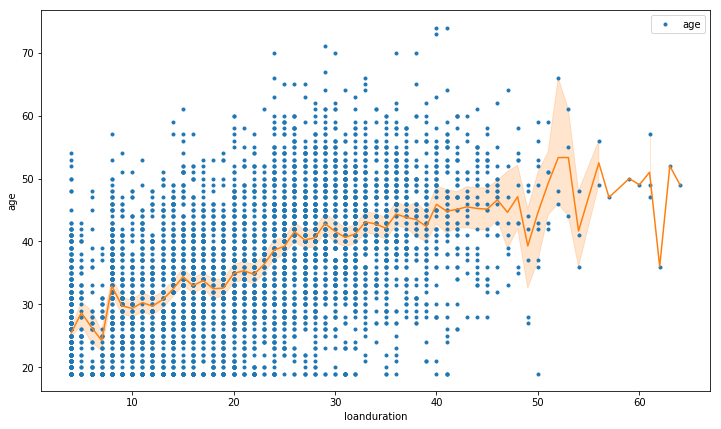

In [17]:
plt.figure(figsize=(12,7))
plt.plot(df.loanduration, df.age,'.', alpha = 1)
sns.lineplot(x=df.loanduration, y=df.age)
plt.show()

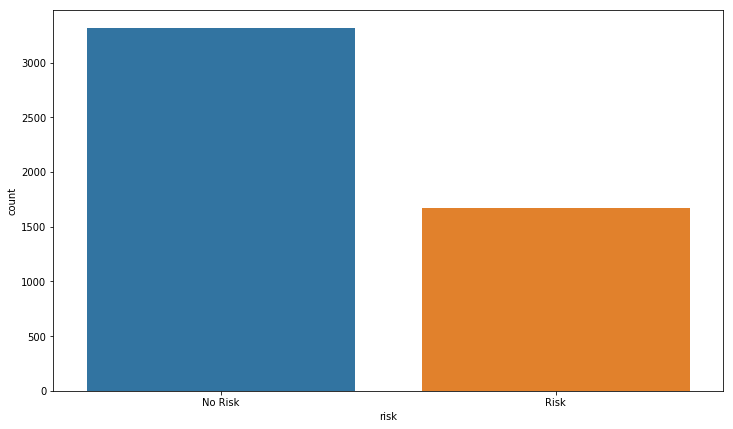

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(df.risk)

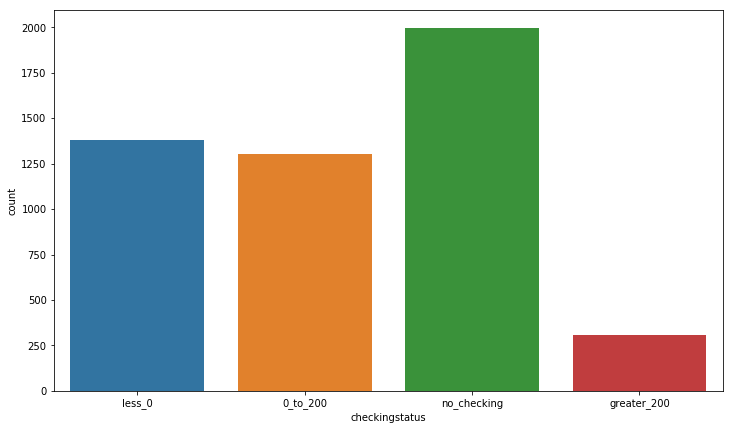

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(df.checkingstatus)

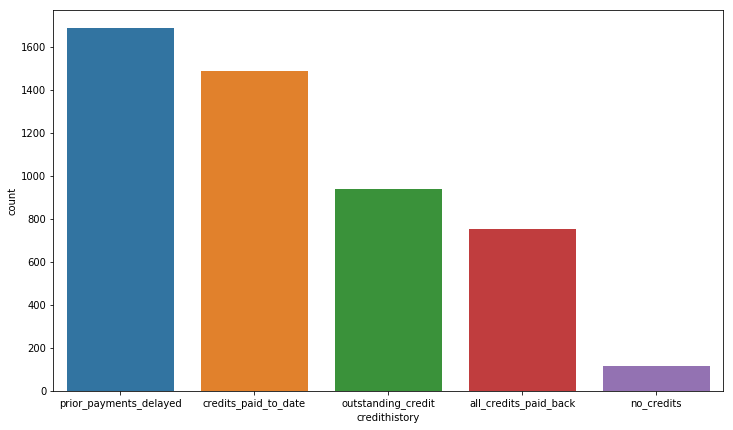

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(df.credithistory)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

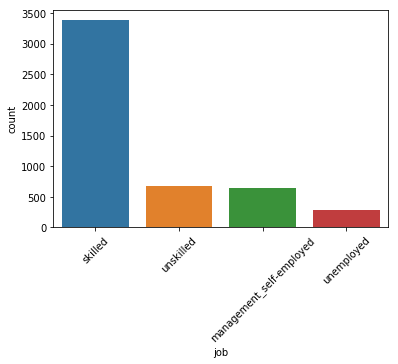

In [21]:
#plt.figure(figsize=(12,7))
sns.countplot(df.job)
plt.xticks(rotation=45)

# Apply Scalling to the Data

In [22]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['loanduration', 'loanamount', 'installmentpercent', 'currentresidenceduration', 'age','existingcreditscount','dependents']

df_transform = pd.DataFrame(data = df)
df_transform[numerical] = scaler.fit_transform(df_transform[numerical])

# Show an example of a record with scaling applied
display(df_transform.head(n = 5))

,checkingstatus,loanduration,credithistory,loanpurpose,loanamount,existingsavings,employmentduration,installmentpercent,sex,othersonloan,currentresidenceduration,ownsproperty,age,installmentplans,housing,existingcreditscount,job,dependents,telephone,foreignworker,risk
0,less_0,0.083333,prior_payments_delayed,furniture,0.172326,less_100,1_to_4,0.0,female,none,0.0,savings_insurance,0.181818,stores,own,0.333333,skilled,0.0,none,yes,No Risk
1,less_0,0.516667,credits_paid_to_date,car_used,0.012165,100_to_500,4_to_7,0.4,female,none,0.2,car_other,0.381818,stores,rent,0.000000,unskilled,0.0,none,yes,Risk
2,0_to_200,0.250000,credits_paid_to_date,repairs,0.160424,500_to_1000,less_1,0.4,female,none,0.2,real_estate,0.290909,none,own,0.000000,skilled,0.0,none,yes,No Risk
3,no_checking,0.533333,prior_payments_delayed,appliances,0.496849,unknown,greater_7,0.6,male,co-applicant,0.4,savings_insurance,0.509091,none,own,0.333333,skilled,0.0,none,yes,Risk
4,no_checking,0.400000,outstanding_credit,appliances,0.332837,unknown,greater_7,0.8,male,none,0.4,unknown,0.472727,none,own,0.333333,skilled,0.0,none,yes,Risk


In [23]:
# Split the data into features (df_split) and target (target) label sets
df_split = pd.DataFrame(df.iloc[:,:-1])
target = pd.DataFrame(df.iloc[:,-1:])

In [24]:
# Use get dummies to  enode df_split 
gd = pd.get_dummies(df_split)
encode = list(gd.columns)
len(encode)

60

In [25]:
gd.head()

,loanduration,loanamount,installmentpercent,currentresidenceduration,age,existingcreditscount,dependents,checkingstatus_0_to_200,checkingstatus_greater_200,checkingstatus_less_0,checkingstatus_no_checking,credithistory_all_credits_paid_back,credithistory_credits_paid_to_date,credithistory_no_credits,credithistory_outstanding_credit,credithistory_prior_payments_delayed,loanpurpose_appliances,loanpurpose_business,loanpurpose_car_new,loanpurpose_car_used,loanpurpose_education,loanpurpose_furniture,loanpurpose_other,loanpurpose_radio_tv,loanpurpose_repairs,loanpurpose_retraining,loanpurpose_vacation,existingsavings_100_to_500,existingsavings_500_to_1000,existingsavings_greater_1000,existingsavings_less_100,existingsavings_unknown,employmentduration_1_to_4,employmentduration_4_to_7,employmentduration_greater_7,employmentduration_less_1,employmentduration_unemployed,sex_female,sex_male,othersonloan_co-applicant,othersonloan_guarantor,othersonloan_none,ownsproperty_car_other,ownsproperty_real_estate,ownsproperty_savings_insurance,ownsproperty_unknown,installmentplans_bank,installmentplans_none,installmentplans_stores,housing_free,housing_own,housing_rent,job_management_self-employed,job_skilled,job_unemployed,job_unskilled,telephone_none,telephone_yes,foreignworker_no,foreignworker_yes
0,0.083333,0.172326,0.0,0.0,0.181818,0.333333,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
1,0.516667,0.012165,0.4,0.2,0.381818,0.000000,0.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
2,0.250000,0.160424,0.4,0.2,0.290909,0.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
3,0.533333,0.496849,0.6,0.4,0.509091,0.333333,0.0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0.400000,0.332837,0.8,0.4,0.472727,0.333333,0.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [26]:
encode

['loanduration',
 'loanamount',
 'installmentpercent',
 'currentresidenceduration',
 'age',
 'existingcreditscount',
 'dependents',
 'checkingstatus_0_to_200',
 'checkingstatus_greater_200',
 'checkingstatus_less_0',
 'checkingstatus_no_checking',
 'credithistory_all_credits_paid_back',
 'credithistory_credits_paid_to_date',
 'credithistory_no_credits',
 'credithistory_outstanding_credit',
 'credithistory_prior_payments_delayed',
 'loanpurpose_appliances',
 'loanpurpose_business',
 'loanpurpose_car_new',
 'loanpurpose_car_used',
 'loanpurpose_education',
 'loanpurpose_furniture',
 'loanpurpose_other',
 'loanpurpose_radio_tv',
 'loanpurpose_repairs',
 'loanpurpose_retraining',
 'loanpurpose_vacation',
 'existingsavings_100_to_500',
 'existingsavings_500_to_1000',
 'existingsavings_greater_1000',
 'existingsavings_less_100',
 'existingsavings_unknown',
 'employmentduration_1_to_4',
 'employmentduration_4_to_7',
 'employmentduration_greater_7',
 'employmentduration_less_1',
 'employmentdu

In [27]:
# Import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(gd,target,test_size = 0.2,random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3985 samples.
Testing set has 997 samples.


## Import modeling 

In [28]:
# Import whats needed to perform modeling 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression 
from sklearn import svm, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
import statistics 


## Model the data 

In [29]:
# Create an array of Classifiers & Names and append different classification models to our array.
classifiers = []
names =[]
model1 = xgb.XGBClassifier()
name1 = "xgb"
names.append(name1)
classifiers.append(model1)

model2 = svm.SVC()
name2 = "SVC"
names.append(name2)
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
name3 = "DecisionTreeClassifier"
names.append(name3)
classifiers.append(model3)

model4 = RandomForestClassifier()
name4 = "RandomForestClassifier"
names.append(name4)
classifiers.append(model4)

model5 = LogisticRegression()
name5 = "LogisticRegression"
names.append(name5)
classifiers.append(model5)

model6 = SGDClassifier()
name6 = 'SGD'
names.append(name6)
classifiers.append(model6)

# XGB

In [30]:
# Fit the XGB model to the data
model1.fit (X_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
# Predict XGB on the data and save it as y_pred
y_pred  = model1.predict(X_test)

In [32]:
# Perform a confusion matrix and take a proper look at the prediction
confusion_matrix(y_test,y_pred)

array([[639,  35],
       [ 96, 227]])

In [33]:
# Use cross_val_score on the test data and the following is the score after 5 folds 
scores=cross_val_score(model1,X_test,y_test,cv=10)
print(cross_val_score(model1,X_test,y_test,cv=10))

[0.76237624 0.73267327 0.8019802  0.76       0.75757576 0.75757576
 0.78787879 0.7979798  0.72727273 0.75757576]


In [34]:
x = statistics.mean(scores) 

# Printing the mean 
print("Mean is :", x) 

Mean is : 0.7642888288828883


In [35]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

[[639  35]
 [ 96 227]]


### Classification Error: Overall, how often is the classifier incorrect?

In [36]:
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.13139418254764293
0.1313941825476429


### Specificity: When the actual value is negative, how often is the prediction correct?


In [37]:
specificity = TN / (TN + FP)

print(specificity)

0.9480712166172107


In [38]:
print(classification_report(y_test,y_pred))
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

     No Risk       0.87      0.95      0.91       674
        Risk       0.87      0.70      0.78       323

    accuracy                           0.87       997
   macro avg       0.87      0.83      0.84       997
weighted avg       0.87      0.87      0.86       997

Accuracy Score : 0.8686058174523571


In [39]:
predictions = model1.fit(X_test, y_test).predict(X_train)
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions)))

Accuracy score on training data: 0.7777


# SVC

In [40]:
# Fit the SVC model to the data
model2.fit (X_test,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
# Predict SVC on the data and save it as y_pred
y_pred  = model2.predict(X_test)

In [42]:
# Perform a confusion matrix and take a proper look at the prediction
cm2 = confusion_matrix(y_test,y_pred)
print(cm2)

[[640  34]
 [176 147]]


In [43]:
# Use cross_val_score on the test data and the following is the score after 5 folds 
scores=cross_val_score(model2,X_test,y_test,cv=10)
print(cross_val_score(model2,X_test,y_test,cv=10))

[0.78217822 0.8019802  0.76237624 0.78       0.76767677 0.75757576
 0.78787879 0.7979798  0.73737374 0.75757576]


In [44]:
x = statistics.mean(scores) 

# Printing the mean 
print("Mean is :", x) 

Mean is : 0.7732595259525953


In [45]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

[[640  34]
 [176 147]]


### Classification Error: Overall, how often is the classifier incorrect?

In [46]:

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.21063189568706117
0.2106318956870612


### Specificity: When the actual value is negative, how often is the prediction correct?

In [47]:
specificity = TN / (TN + FP)

print(specificity)

0.9495548961424333


In [48]:
print(classification_report(y_test,y_pred))
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

     No Risk       0.78      0.95      0.86       674
        Risk       0.81      0.46      0.58       323

    accuracy                           0.79       997
   macro avg       0.80      0.70      0.72       997
weighted avg       0.79      0.79      0.77       997

Accuracy Score : 0.7893681043129388


In [49]:
predictions = model2.fit(X_test, y_test).predict(X_train)
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions)))

Accuracy score on training data: 0.7804


# Decision Tree

In [50]:
#Fit the Decision Tree model to the data
model3.fit (X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
# Predict Decision Tree on the data and save it as y_pred
y_pred  = model3.predict(X_test)

In [52]:
# Perform a confusion matrix and take a proper look at the prediction
cm3 = confusion_matrix(y_test,y_pred)
print(cm3)

[[674   0]
 [  0 323]]


In [53]:
# Use cross_val_score on the test data and the following is the score after 5 folds 
scores=cross_val_score(model3,X_test,y_test,cv=10)
print(cross_val_score(model3,X_test,y_test,cv=10))

[0.68316832 0.76237624 0.68316832 0.72       0.65656566 0.70707071
 0.65656566 0.62626263 0.64646465 0.73737374]


In [54]:
x = statistics.mean(scores) 

# Printing the mean 
print("Mean is :", x) 

Mean is : 0.6889017901790179


In [55]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

[[674   0]
 [  0 323]]


### Classification Error: Overall, how often is the classifier incorrect?

In [56]:

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.0
0.0


### Specificity: When the actual value is negative, how often is the prediction correct?


In [57]:
specificity = TN / (TN + FP)

print(specificity)

1.0


In [58]:
print(classification_report(y_test,y_pred))
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00       674
        Risk       1.00      1.00      1.00       323

    accuracy                           1.00       997
   macro avg       1.00      1.00      1.00       997
weighted avg       1.00      1.00      1.00       997

Accuracy Score : 1.0


In [59]:
predictions = model3.fit(X_test, y_test).predict(X_train)
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions)))

Accuracy score on training data: 0.6878


# RandomForestClassifier

In [60]:
#Fit the RandomForestClassifier model to the data
model4.fit (X_test,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
# Predict RandomForestclassifier on the data and save it as y_pred
y_pred  = model4.predict(X_test)

In [62]:
# Perform a confusion matrix and take a proper look at the prediction
cm4 = confusion_matrix(y_test,y_pred)
print(cm4)

[[672   2]
 [ 18 305]]


In [63]:
# Use cross_val_score on the test data and the following is the score after 5 folds 
scores=cross_val_score(model4,X_test,y_test,cv=10)
print(cross_val_score(model4,X_test,y_test,cv=10))

[0.7029703  0.78217822 0.73267327 0.74       0.6969697  0.76767677
 0.73737374 0.72727273 0.74747475 0.74747475]


In [64]:
x = statistics.mean(scores) 

# Printing the mean 
print("Mean is :", x) 

Mean is : 0.7661088108810881


In [65]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)


[[672   2]
 [ 18 305]]


### Classification Accuracy: Overall, how often is the classifier correct?

In [66]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.9799398194583752
0.9799398194583752


### Classification Error: Overall, how often is the classifier incorrect?

In [67]:

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.020060180541624874
0.02006018054162484


### Specificity: When the actual value is negative, how often is the prediction correct?


In [68]:
specificity = TN / (TN + FP)

print(specificity)

0.9970326409495549


In [69]:
print(classification_report(y_test,y_pred))
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

     No Risk       0.97      1.00      0.99       674
        Risk       0.99      0.94      0.97       323

    accuracy                           0.98       997
   macro avg       0.98      0.97      0.98       997
weighted avg       0.98      0.98      0.98       997

Accuracy Score : 0.9799398194583752


In [70]:
predictions = model4.fit(X_test, y_test).predict(X_train)
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions)))

Accuracy score on training data: 0.7566


# LogReg

In [71]:
#Fit the LogisticRegression model to the data
model5.fit (X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
# Predict LogisticRegression on the data and save it as y_pred
y_pred  = model5.predict(X_test)

In [73]:
# Perform a confusion matrix and take a proper look at the prediction
cm5 = confusion_matrix(y_test,y_pred)
print(cm5)

[[608  66]
 [130 193]]


In [74]:
# Use cross_val_score on the test data and the following is the score after 5 folds
scores=cross_val_score(model5,X_test,y_test,cv=10)
print(cross_val_score(model5,X_test,y_test,cv=10))

[0.74257426 0.78217822 0.81188119 0.74       0.76767677 0.7979798
 0.77777778 0.78787879 0.76767677 0.76767677]


In [75]:
x = statistics.mean(scores) 

# Printing the mean 
print("Mean is :", x) 

Mean is : 0.7743300330033003


In [76]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[608  66]
 [130 193]]


### Classification Error: Overall, how often is the classifier incorrect?

In [77]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.19658976930792377
0.19658976930792382


### Specificity: When the actual value is negative, how often is the prediction correct?


In [78]:
specificity = TN / (TN + FP)

print(specificity)

0.9020771513353115


In [79]:
print(classification_report(y_test,y_pred))
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

     No Risk       0.82      0.90      0.86       674
        Risk       0.75      0.60      0.66       323

    accuracy                           0.80       997
   macro avg       0.78      0.75      0.76       997
weighted avg       0.80      0.80      0.80       997

Accuracy Score : 0.8034102306920762


In [80]:
predictions = model5.fit(X_test, y_test).predict(X_train)
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions)))

Accuracy score on training data: 0.7817


# SGDClassifier

In [81]:
#Fit the SGDClassifier model to the data
model6.fit (X_test,y_test)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
# Predict SGDClassifier on the data and save it as y_pred
y_pred  = model6.predict(X_test)

In [83]:
# Use cross_val_score on the test data and the following is the score after 5 folds
scores=cross_val_score(model6,X_test,y_test,cv=10)
print(cross_val_score(model6,X_test,y_test,cv=10))

[0.74257426 0.77227723 0.79207921 0.77       0.75757576 0.72727273
 0.74747475 0.58585859 0.75757576 0.71717172]


In [84]:
x = statistics.mean(scores) 

# Printing the mean 
print("Mean is :", x) 

Mean is : 0.7693090309030903


In [85]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[631  43]
 [173 150]]


### Classification Accuracy: Overall, how often is the classifier correct?


In [86]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7833500501504513
0.7833500501504513


### Classification Error: Overall, how often is the classifier incorrect?

In [87]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.21664994984954863
0.21664994984954866


### Sensitivity: When the actual value is positive, how often is the prediction correct?

In [88]:
sensitivity = TP / float(FN + TP)

print(sensitivity)


0.46439628482972134


### Specificity: When the actual value is negative, how often is the prediction correct?


In [89]:
specificity = TN / (TN + FP)

print(specificity)

0.9362017804154302


### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [90]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.06379821958456973
0.06379821958456977


### Precision: When a positive value is predicted, how often is the prediction correct?

In [91]:
precision = TP / float(TP + FP)

print("Precision:",precision)

Precision: 0.7772020725388601


In [92]:
print(classification_report(y_test,y_pred))
print ('Accuracy Score :',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

     No Risk       0.78      0.94      0.85       674
        Risk       0.78      0.46      0.58       323

    accuracy                           0.78       997
   macro avg       0.78      0.70      0.72       997
weighted avg       0.78      0.78      0.77       997

Accuracy Score : 0.7833500501504513


In [93]:
predictions = model6.fit(X_test, y_test).predict(X_train)
print("Accuracy score on training data: {:.4f}".format(accuracy_score(y_train, predictions)))

Accuracy score on training data: 0.7681


# Questions 

### (1) Is there any duplicates found in the data is so how many are there ?

In [94]:
df_duplic
# results  = 18 duplicates

,checkingstatus,loanduration,credithistory,loanpurpose,loanamount,existingsavings,employmentduration,installmentpercent,sex,othersonloan,currentresidenceduration,ownsproperty,age,installmentplans,housing,existingcreditscount,job,dependents,telephone,foreignworker,risk
723,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
808,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
1854,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,male,none,2,real_estate,19,stores,rent,1,skilled,1,none,yes,No Risk
1946,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
2119,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
2214,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
2933,less_0,4,no_credits,car_new,250,less_100,less_1,1,female,none,1,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
3062,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,1,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk
3080,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,male,none,1,real_estate,19,stores,rent,1,unskilled,1,none,yes,No Risk
3081,less_0,4,all_credits_paid_back,car_new,250,less_100,unemployed,1,female,none,2,real_estate,19,none,rent,1,skilled,1,none,yes,No Risk


### (2) From the data set provided whats the most job criteria there is ?

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

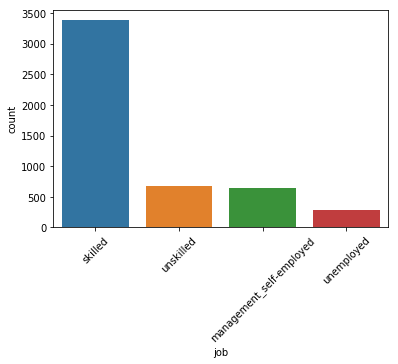

In [95]:
# skilled ranks the highest in jobs
sns.countplot(df.job)
plt.xticks(rotation=45)

### (3) What is the age difference between the youngest and oldest person that received a loan nd the age of those individuals.

In [96]:
# oldest 
df['age'].max()

74

In [97]:
# youngest
df['age'].min()

19

In [98]:
# age difference 
df['age'].max()  - df['age'].min()

55

In [ ]:
credit_r_tr